In [11]:
train_dir = 'mnist_png/mnist_png/training/'
test_dir = 'mnist_png/mnist_png/testing/'

In [ ]:
img_gen = ImageDataGenerator(rescale=1.0/255)

data_gen = img_gen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size=5000,
    shuffle=True,
    class_mode='categorical'
)

Found 60000 images belonging to 10 classes.


In [13]:
x_train, y_train = data_gen[0]
x_test, y_test = data_gen[2]

In [19]:
from tensorflow.keras.applications import VGG16
path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

vgg_model = VGG16(weights=path,include_top=False)

In [20]:
for layer in vgg_model.layers:
    layer.trainabler=False

In [21]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [22]:
custom_classifier = keras.Sequential([
    Flatten(input_shape=(1,1,512)),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    
])

model = keras.Sequential([
    vgg_model,
    custom_classifier
])

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, batch_size=100, epochs=1, validation_data=(x_test,y_test))

50/50 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.1354 - loss: 2.4087 - val_accuracy: 0.2444 - val_loss: 1.9340


In [25]:
for layer in vgg_model.layers[:-4]:
    layer.trainable = True
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1000, epochs=1, validation_data=(x_test,y_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 97s 18s/step - accuracy: 0.1904 - loss: 2.8783 - val_accuracy: 0.1000 - val_loss: 2.3857


In [27]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, " ", acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.1017 - loss: 2.3665
2.3857240676879883   0.10000000149011612


In [28]:
pred = model.predict(x_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step


In [29]:
labels = list(data_gen.class_indices.keys())

7


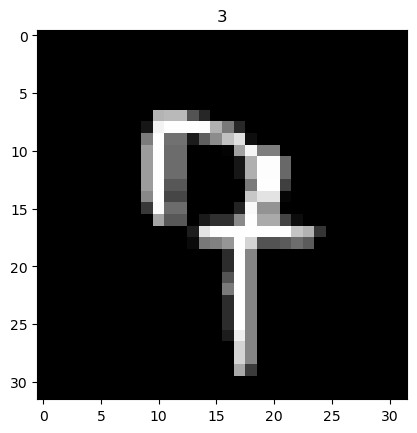

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_test[10])
plt.title(str(labels[np.argmax(pred[10])]))
print(str(labels[np.argmax(y_test[10])]))

In [31]:
y_test[10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)